In [1]:
import findspark
findspark.init("/Users/jennyzhou/Downloads/spark-2.4.5-bin-hadoop2.7")
# NYC Permitted Event Information 5.94M rows
plannedevent = "https://data.cityofnewyork.us/resource/bkfu-528j.csv"

Permitted Events Data

In [2]:
%run data.py

In [3]:
events = fetchData(event)

In [4]:
type(events)

pandas.core.frame.DataFrame

In [5]:
events.head(2)

,event_id,event_name,start_date_time,end_date_time,event_agency,event_type,event_borough,event_location,event_street_side,street_closure_type,community_board,police_precinct
0,81202,Rally,2013-08-03T12:00:00.000,2013-08-03T19:30:00.000,Parks Department,Special Event,Manhattan,Tompkins Square Park: Old Bandshell,NaN,NaN,"3,","9,"
1,368421,Big Apple Circus,2017-11-18T19:00:00.000,2017-11-18T20:00:00.000,Parks Department,Special Event,Manhattan,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",NaN,NaN,"7,","20,"


In [66]:
#get 2020 data out
planned_event = "https://data.cityofnewyork.us/resource/bkfu-528j.csv?$select=event_id,event_name,start_date_time,end_date_time,event_type,event_borough&$where=start_date_time>'2020-01-01T00:00:00.000'&$limit=5000000"

In [67]:
planned = pd.read_csv(planned_event)

In [68]:
planned.count()

event_id           1524105
event_name         1524105
start_date_time    1524105
end_date_time      1524105
event_type         1524105
event_borough      1524105
dtype: int64

In [69]:
planned.head(2)

,event_id,event_name,start_date_time,end_date_time,event_type,event_borough
0,516637,Lawn Maintenance- Veteran's Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
1,516638,Lawn Maintenance,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan


In [70]:
planned.dtypes

event_id            int64
event_name         object
start_date_time    object
end_date_time      object
event_type         object
event_borough      object
dtype: object

In [84]:
#convert data type
#plannedpd = planned.astype({"start_date_time":'datetime64[ns]',"end_date_time":'datetime64[ns]', "event_name":str, "event_type":str, "event_borough":str})

In [88]:
#plannedpd.dtypes

event_id                    int64
event_name                 object
start_date_time    datetime64[ns]
end_date_time      datetime64[ns]
event_type                 object
event_borough              object
dtype: object

In [64]:
#get 2020 data out
#updated_event = "https://data.cityofnewyork.us/resource/tvpp-9vvx.csv?$select=event_id,event_name,start_date_time,end_date_time,event_type,event_borough&$where=start_date_time>'2020-01-01T00:00:00.000'&$limit=5000000"

In [72]:
updated = pd.read_csv(updated_event)

In [73]:
updated.count()

event_id           19494
event_name         19494
start_date_time    19494
end_date_time      19494
event_type         19494
event_borough      19494
dtype: int64

In [94]:
planneddf = pandas_to_spark(planned)

In [95]:
planneddf.printSchema()

root
 |-- event_id: string (nullable = true)
 |-- event_name: string (nullable = true)
 |-- start_date_time: string (nullable = true)
 |-- end_date_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- event_borough: string (nullable = true)



In [96]:
planneddf.show(2)

+--------+--------------------+--------------------+--------------------+-------------+-------------+
|event_id|          event_name|     start_date_time|       end_date_time|   event_type|event_borough|
+--------+--------------------+--------------------+--------------------+-------------+-------------+
|  516637|Lawn Maintenance-...|2020-01-01T00:01:...|2020-01-01T23:59:...|Special Event|    Manhattan|
|  516638|    Lawn Maintenance|2020-01-01T00:01:...|2020-01-01T23:59:...|Special Event|    Manhattan|
+--------+--------------------+--------------------+--------------------+-------------+-------------+
only showing top 2 rows



In [97]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import month, year
planneddf = planneddf.withColumn("date", to_timestamp("start_date_time", "yyyy-MM-dd'T'HH:mm:ss.SSS"))

In [98]:
planneddf.show(3)

+--------+--------------------+--------------------+--------------------+-------------+-------------+-------------------+
|event_id|          event_name|     start_date_time|       end_date_time|   event_type|event_borough|               date|
+--------+--------------------+--------------------+--------------------+-------------+-------------+-------------------+
|  516637|Lawn Maintenance-...|2020-01-01T00:01:...|2020-01-01T23:59:...|Special Event|    Manhattan|2020-01-01 00:01:00|
|  516638|    Lawn Maintenance|2020-01-01T00:01:...|2020-01-01T23:59:...|Special Event|    Manhattan|2020-01-01 00:01:00|
|  516639|Lawn Maintenance-...|2020-01-01T00:01:...|2020-01-01T23:59:...|Special Event|    Manhattan|2020-01-01 00:01:00|
+--------+--------------------+--------------------+--------------------+-------------+-------------+-------------------+
only showing top 3 rows



In [99]:
planneddf.orderBy(planneddf.date.desc()).show(10)

+--------+-----------+--------------------+--------------------+-------------+-------------+-------------------+
|event_id| event_name|     start_date_time|       end_date_time|   event_type|event_borough|               date|
+--------+-----------+--------------------+--------------------+-------------+-------------+-------------------+
|  532647|Celebration|2020-12-30T13:00:...|2020-12-30T14:00:...|Special Event|    Manhattan|2020-12-30 13:00:00|
|  532647|Celebration|2020-12-30T13:00:...|2020-12-30T14:00:...|Special Event|    Manhattan|2020-12-30 13:00:00|
|  532647|Celebration|2020-12-30T13:00:...|2020-12-30T14:00:...|Special Event|    Manhattan|2020-12-30 13:00:00|
|  532647|Celebration|2020-12-30T13:00:...|2020-12-30T14:00:...|Special Event|    Manhattan|2020-12-30 13:00:00|
|  532647|Celebration|2020-12-30T13:00:...|2020-12-30T14:00:...|Special Event|    Manhattan|2020-12-30 13:00:00|
|  532647|Celebration|2020-12-30T13:00:...|2020-12-30T14:00:...|Special Event|    Manhattan|2020

In [100]:
planneddf.createOrReplaceTempView("plannedT")

In [101]:
planned = spark.sql("""
SELECT DATE(date) AS event_date,
    COUNT(*) AS num_of_events
FROM plannedT
GROUP BY event_date
ORDER BY event_date DESC
""")

In [102]:
planned.show(3)

+----------+-------------+
|event_date|num_of_events|
+----------+-------------+
|2020-12-30|           72|
|2020-12-29|           64|
|2020-12-27|           93|
+----------+-------------+
only showing top 3 rows



In [103]:
planned_pd = planned.toPandas()

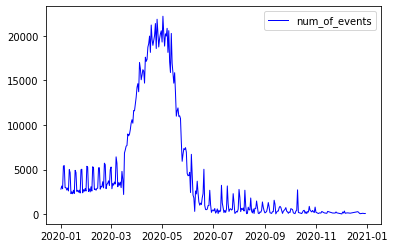

In [106]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot('event_date','num_of_events', data=planned_pd, marker='', color='blue', linewidth=1)
plt.legend()